# Intro

A dataframes of total ... and .. observations were analysed, spanning years from 2003-2018 and 2018-2015, respectively. First observation in the new dataset is from January 2018, and historical dataset consist of observations until May 2018. This caused doubeling when merging the dataset, so all observations from the historical dataset from 2018 were discarded. The merged dataset was then grouped based on the type of crime into final 10 categories ......

# Assignment 1.1: Temporal Overview
Let's start by getting the big picture of how crime has changed over the full 20+ year period covered by your combined dataset.

Using your combined dataset (2003–present), plot the total number of incidents per year for each of your Personal Focus Crimes. Display at least the years 2003–2025.
Make sure your plot follows good visualization practices: labeled axes, a legend, a descriptive title.
Identify and comment on at least two notable features in the plot — for example, long-term trends, sudden drops or spikes, or the impact of COVID-19 in 2020. For each feature, offer a possible explanation.

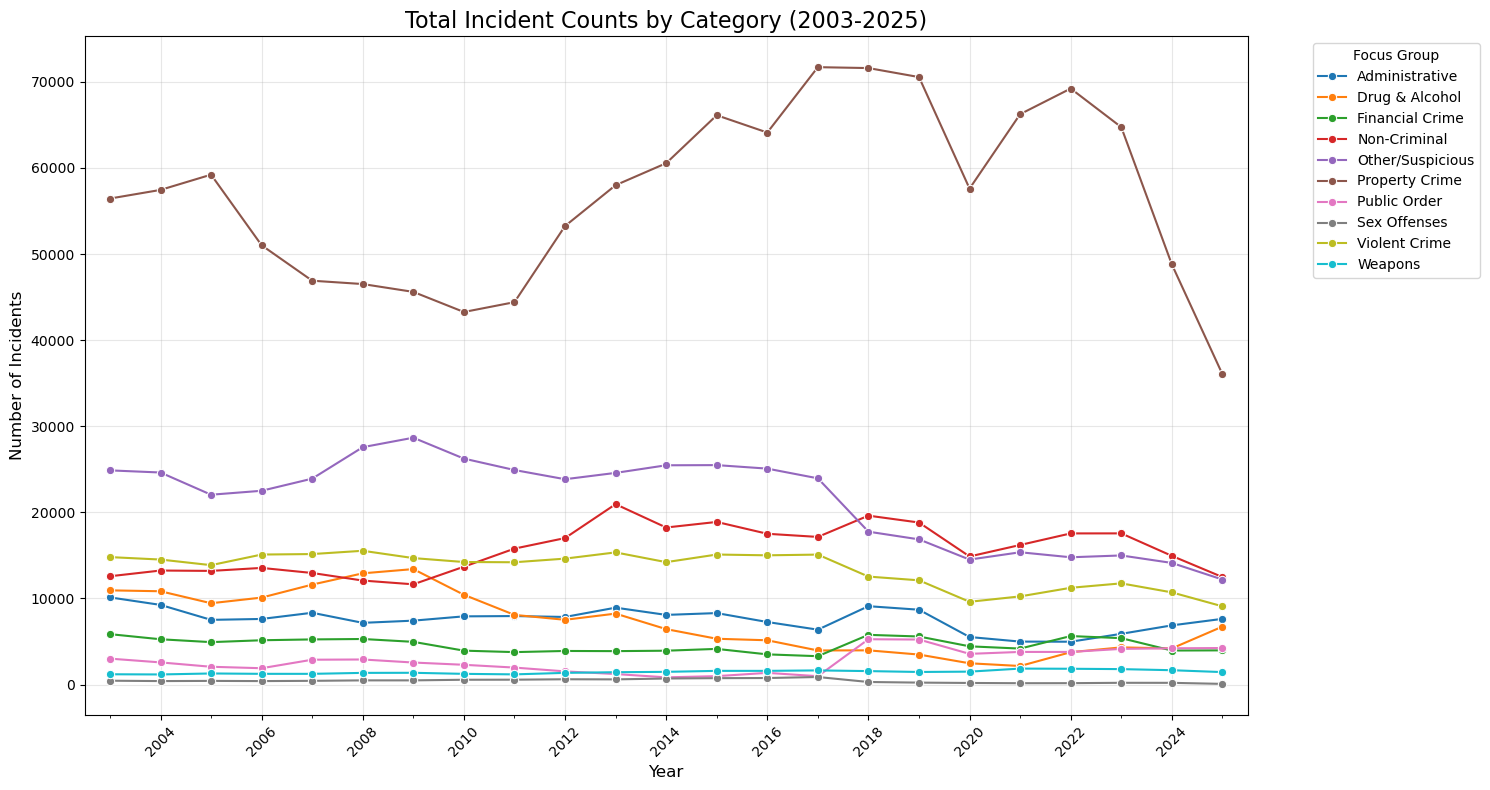

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../data/clean-data/sf_clean_data_grouped.csv")
data.head()

# filter for 2003 - 2025
filtered_data = data[(data['Year'] >= 2003) & (data['Year'] <= 2025)]

# Count incidents by year and category
incident_counts = filtered_data.groupby(['Year', 'Focus Group']).size().reset_index(name='Count')

# Create the plot
plt.figure(figsize=(15, 8))

# Option 1: Line plot for all categories
sns.lineplot(data=incident_counts, x='Year', y='Count', hue='Focus Group', marker='o')
plt.title('Total Incident Counts by Category (2003-2025)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)

# Set x-axis ticks
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(2))  # Show every 2nd year
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor ticks for every year
ax.set_xlim(2002.5, 2025.5)  # Add a little padding
plt.xticks(rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Focus Group')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Over the years 2003 until 2025, the highest rate of crime were those falling into category of Property Crimes, and so any kind of theft, vandalism, trespassing etc. It is in line with other analyses, showing that property crimes in San Francisco have higher rate than national average. 

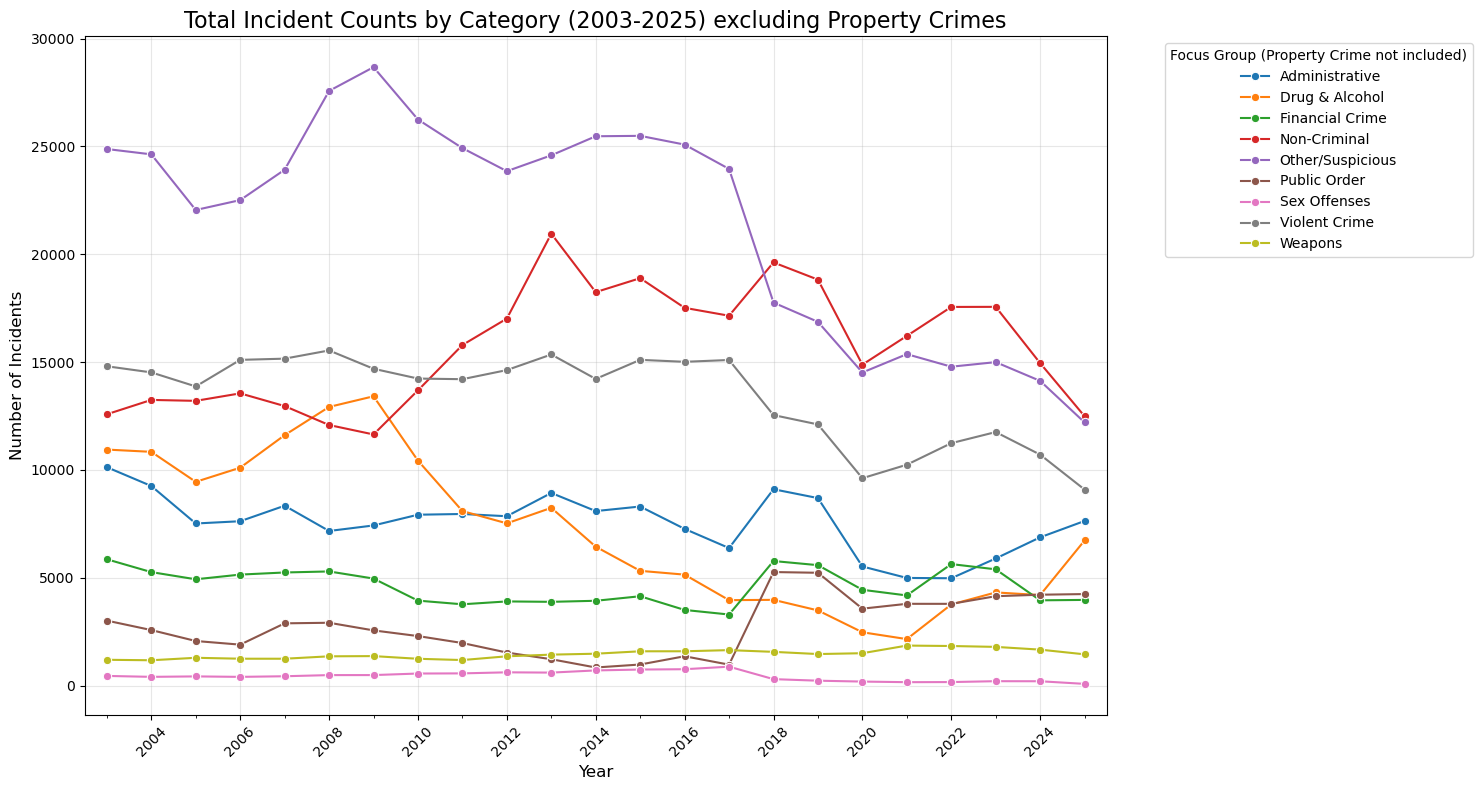

In [ ]:
# Plot without Property Crime

# Count incidents by year and category
other_data = data[(data['Year'] >= 2003) & (data['Year'] <= 2025) & (data['Focus Group'] != 'Property Crime')]
other_counts = other_data.groupby(['Year', 'Focus Group']).size().reset_index(name='Count')

plt.figure(figsize=(15, 8))

# Option 1: Line plot for all categories
sns.lineplot(data=other_counts, x='Year', y='Count', hue='Focus Group', marker='o')
plt.title('Total Incident Counts by Category (2003-2025) (excluding Property Crimes)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)

# Set x-axis ticks
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(2))  # Show every 2nd year
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor ticks for every year
ax.set_xlim(2002.5, 2025.5)  # Add a little padding
plt.xticks(rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Focus Group (Property Crime not included)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Property Crime category has significantly higher counts than the rest, therefore we excluded it from this plot. Until 2018, the rate of Non-Violent crimes became higher, while crimes connected to drugs and alcohol lowered. From 2009 until 2025, the rate of other or suspicious crimes lowered almost by half, this can be due to the realisation that more specific classification needed before grouping to 'Others'. After 2018 there is a general decrease in most of the crimes until 2020. This can be due to COVID-19 pandemic and quarantine. However, notable spikes in non-violent, public order, administrative and financial crimes can be observed. No evidence explains why these can appear, but they can be explained by the change of the police reporting system and the two datasets.